# Simulation

In [1]:
## Run multiple comparison
from simulation_files.main import *  
from simulation_files.graphic_visualization import * 
from simulation_files.performance_visualization_utils import *

numpy is already installed.
pandas is already installed.
matplotlib is already installed.
geopy is already installed.
math is already installed.
folium is already installed.


scikit-learn has been installed.
simpy is already installed.
tqdm is already installed.
imageio is already installed.
nbformat is already installed.
geopandas is already installed.
dill is already installed.
wdbo_algo is already installed.
wdbo_criterion is already installed.


imageio[pyav] has been installed.


imageio[opencv] has been installed.
selenium is already installed.
multiprocess is already installed.
scipy is already installed.
All packages are up to date.
pymobility is already installed.


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Set Simulation Parameters

In [2]:
#All possible motion models
motion_models = [
    'biased_random_walk','random_walk','random_waypoint','levy_walk','truncated_levy_walk','hybrid_gmm', 'brownian_motion'
    ]
#Experiment parameters
id = 0 #simulation id
verbose=True
ue_file_path = None #Alternatively provide CSV file w. real UEs traces. 
bs_filepath= "simulation_datasets/Paris_BSs_subset_km2.csv" #Provide BS CSV file. 
#Alternatively provide n_bss,hence BSs will be randomly generated.
n_bss = None
n_users= 870 #initial population approx. n_bss *72 (from bs_filepath ==> n_bss = 12)
n_clusters = None #if not None, UEs will be clustered
waypoints = None #if n_clusters > 0, it will compute the waypoints. If already computed, pass them as list of coordinates (x,y).

n_rounds = 20 #select the number of optimization rounds (tot_sim_time = n_rounds*move_interval) or the simulation time
sim_time = None #seconds
motion_params = {'mobility_model': motion_models[0]} #See user.py or mobility_class.py for details on params needed
randomPick = False #if True, it will perform random picking
const_pick =False #if True, it will perform const picking strategy
# If both are false, It will perform WDBO strategy
#!!Note that Power choiche mode are mutally exclusive.
density_thr=0.5 #UEs - BS minimal density w.r.t BSs inside border perimeter.
alpha_fairness= 1
given_metric = DISTANCE_METRIC #from simulation_env.py
metric_to_use='m'

lambda_ = (1/3) #Arrival rate
mu = (1/10) #Departure rate
epsilon = 0.3 #Pausing probability
move_interval = 2 #s, displacement period
optimizer_kwargs = None #WDBO args, if none Default are used ==> see base_station.py - set_optimizer

ue_distribution_params = None #dict, to generate ues according to a specific distribution, see main.py
ue_max_velocity= 0.011 #m/2s
ue_min_velocity = 1.7*10**(-3) #m/2s
dbscan_args = None #using default args
ue_file_path = None 

## Run simulation

----------------------------------------------

Simulation ID: 0 

alpha_fairness: 1 

Reference distance metric changed from km to: m (w.r.t simulation_env.py) 

Motion model: biased_random_walk 

Power metric changed from dBm to: mW (w.r.t simulation_env.py) 

Network area:  2.64 km^2 

n_tiles:  4224 (25.0 m) 

Displacement interval:  2 s 

Translation domain: [1.7,11.0] m 

User velocity domain: [3.06,19.8] km/h 

BS max range 470.0 m 

num_BSs:  12 

BS areal density: 4.545 

Power Domain [10.0, 39810.717] (mW) 

num_active_users:  870 

Simulation started at: 0s 

End time: 40 s 

----------------------------------------------

== Event translation, time: 2s ==
== Active users: 899 == 

time: 2024-10-12 15:39:10.411033 bs_id: 752292040 power levels (in,out): (453.27985560158504, 838.5950027325807) 

Served UEs: [{'ue_id': 270, 'inner_region': True, 'd': 29.76, 'sinr': 38.92743837334434}, {'ue_id': 192, 'inner_region': True, 'd': 49.6, 'sinr': 5.715318563605887}, {'ue_id': 481, 'i

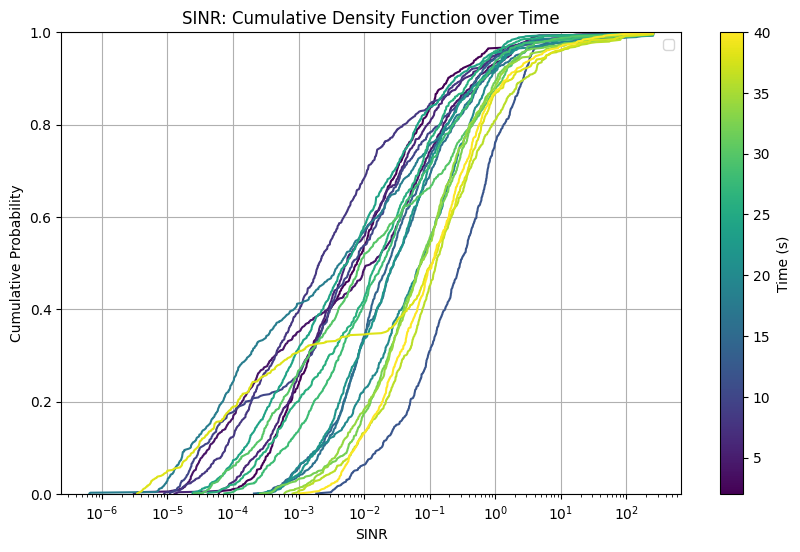

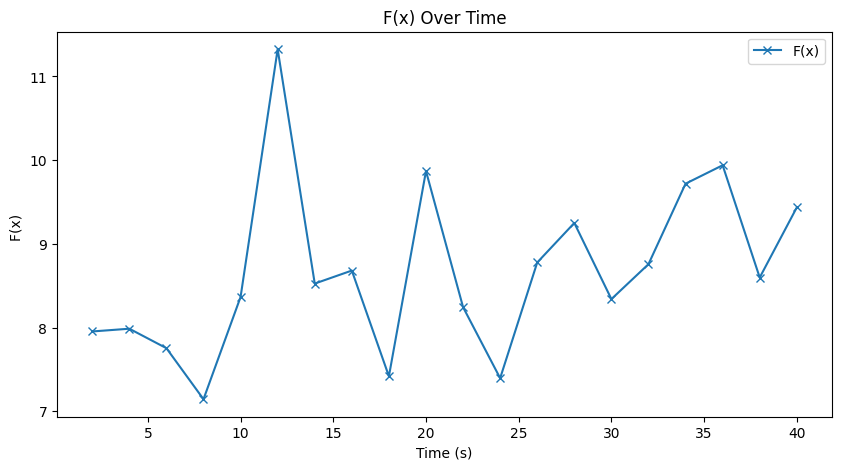

In [3]:
sim = SIMULATION(
    id = id, verbose=verbose, alpha_fairness=alpha_fairness, metric_to_use=metric_to_use, given_metric=given_metric,
    hot_spots = waypoints, lambda_=lambda_, mu=mu, epsilon=epsilon, move_interval=move_interval,
    optimizer_kwargs=optimizer_kwargs
    )

sim.run(
    sim_time=sim_time,n_users= n_users,n_clusters=n_clusters,n_bss = n_bss,min_rounds = n_rounds,
    motion_params=motion_params,bs_filepath= bs_filepath, ue_file_path=ue_file_path,
    ue_distribution_params=ue_distribution_params,ue_max_velocity=ue_max_velocity,
    ue_min_velocity=ue_min_velocity,dbscan_args=dbscan_args,
    randomPick = randomPick,const_pick =const_pick, density_thr=density_thr,
            )

## Performance plots

f(x) wdbo - Number of replicates: 7
f(x) rndm - Number of replicates: 7
f(x) const - Number of replicates: 7


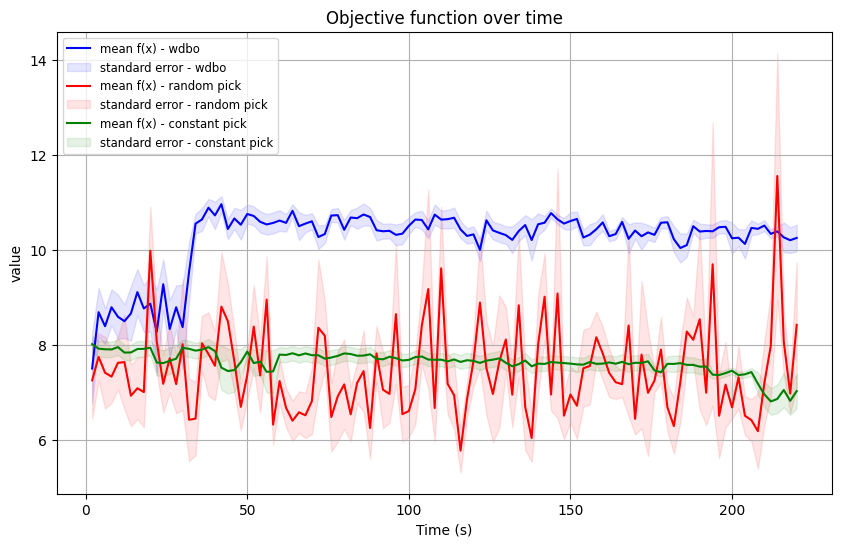

SINR CDF wdbo - Number of replicates: 7
SINR CDF rndm - Number of replicates: 7
SINR CDF const - Number of replicates: 7


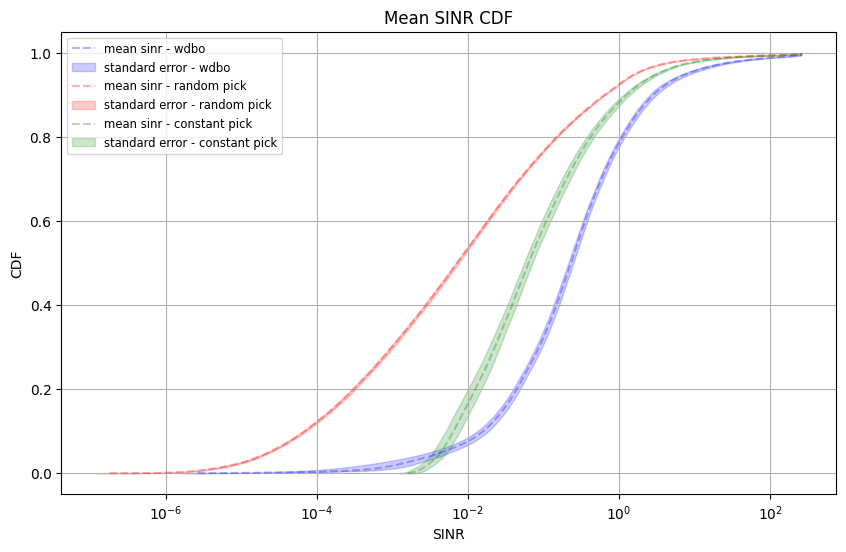

SINR CDF rndm - Number of replicates: 7


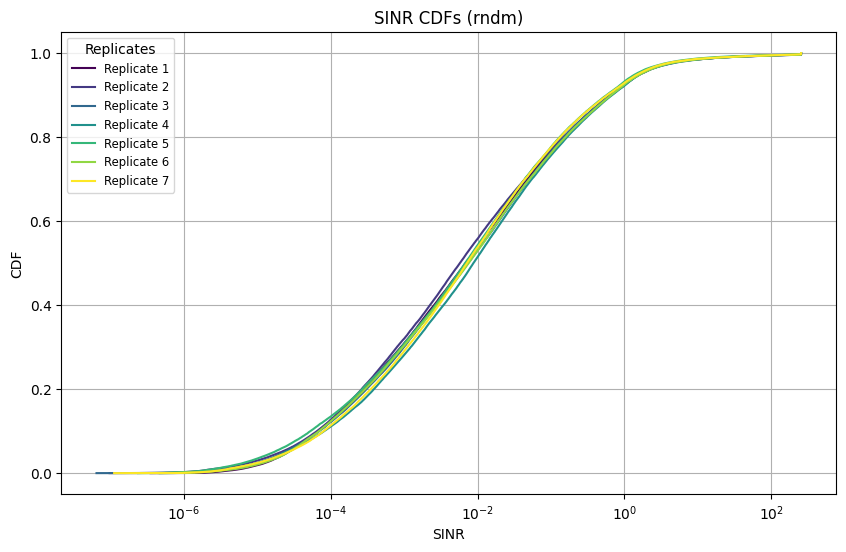

SINR CDF wdbo - Number of replicates: 7


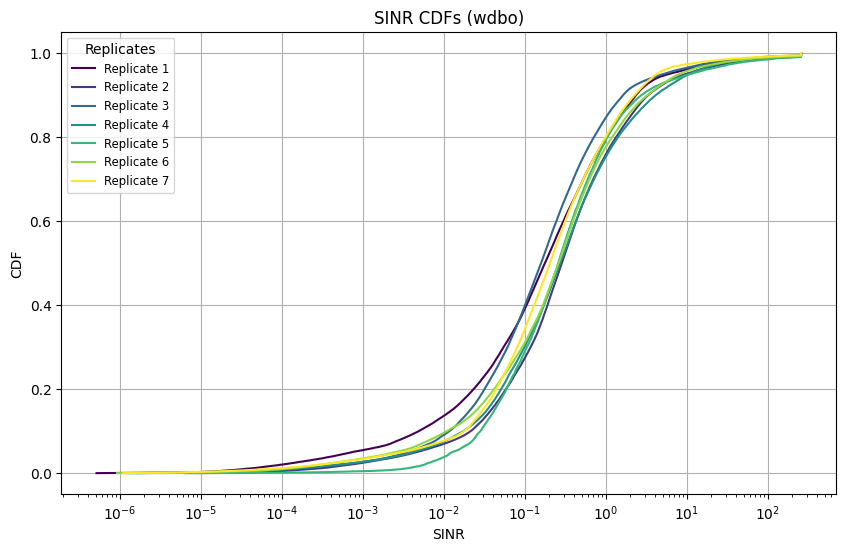

SINR CDF const - Number of replicates: 7


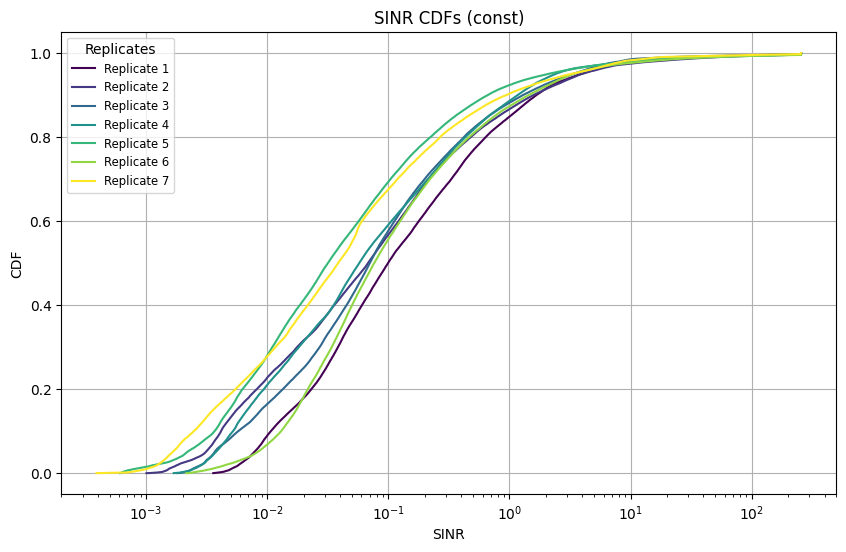

In [4]:
#choose the mobility model
m_model = 'biased_random_walk'
#select the parent folders
fd = 'example' 

random_pick_folder = f'output/results/performance_logs/{fd}/obj_rndm/{m_model}'
wdbo_folder = f'output/results/performance_logs/{fd}/obj_wdbo/{m_model}'
const_folder = f'output/results/performance_logs/{fd}/obj_const/{m_model}'

compare_metrics(
    random_pick_folder = random_pick_folder,wdbo_folder=wdbo_folder,const_folder=const_folder,
    ix = m_model, metric = 'obj', alpha_fair = 1, prime=False)

random_pick_folder = f'output/results/performance_logs/{fd}/sinr_rndm/{m_model}'
wdbo_folder = f'output/results/performance_logs/{fd}/sinr_wdbo/{m_model}'
const_folder = f'output/results/performance_logs/{fd}/sinr_const/{m_model}'
compare_metrics(
    random_pick_folder = random_pick_folder,wdbo_folder=wdbo_folder,const_folder=const_folder,
    ix = m_model, metric = 'sinr', alpha_fair = 1, prime=False)

safety_check_sinr_cdf(folder_path = random_pick_folder, ix=m_model, t1='rndm',file_type='*.csv')
safety_check_sinr_cdf(folder_path = wdbo_folder, ix=m_model, t1='wdbo',file_type='*.csv')
safety_check_sinr_cdf(folder_path = const_folder, ix=m_model, t1='const',file_type='*.csv')

## Network Visualization

In [5]:
#choose the motion model
m = 'biased_random_walk'
#select the BS dataset
bs_fp = 'simulation_datasets/Paris_BSs_subset_m2.csv'
#select the number of user to visualize
num_ues_ = 2
#select the id of the ues_traces file willing to show 
# e.g. the one related to 'metrics_logs_sim100020_wdbo_biased_random_walk'
id = 0
#set the respective model
opt_model = 'wdbo' #const or rndm

n_bss: 12
Copy and paste in the web-browser:

file:///home/user/workspace/output/visualization/voronoi_gif_grid_sim_biased_random_walk_wdbo0_result.html
n_bss: 12
Copy and paste in the web-browser:

file:///home/user/workspace/output/visualization/voronoi_gif_interactive_sim_biased_random_walk_wdbo0_result.html


n_bss: 12
Copy and paste in the web-browser:

file:///home/user/workspace/output/visualization/gif_grid_sim_biased_random_walk_wdbo0_result.html
n_bss: 12
Copy and paste in the web-browser:

file:///home/user/workspace/output/visualization/gif_interactive_sim_biased_random_walk_wdbo0_result.html


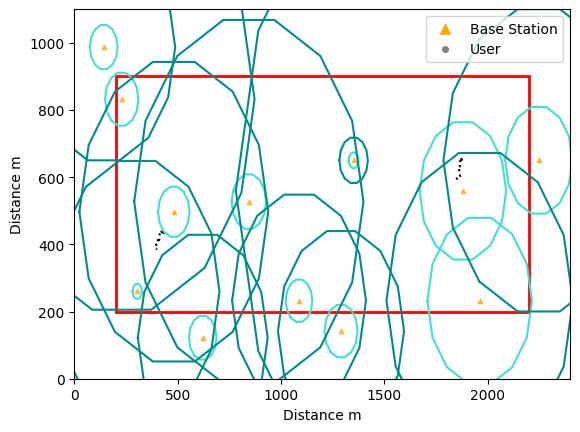

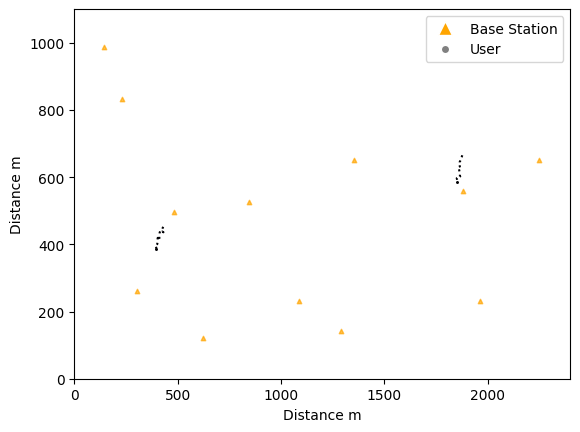

In [6]:
render_it(
    motion_model = m,optimization_model = opt_model, id = id, bs_file=bs_fp, num_ues_samples = num_ues_)

## WDBO's Hyper-parameters visualization

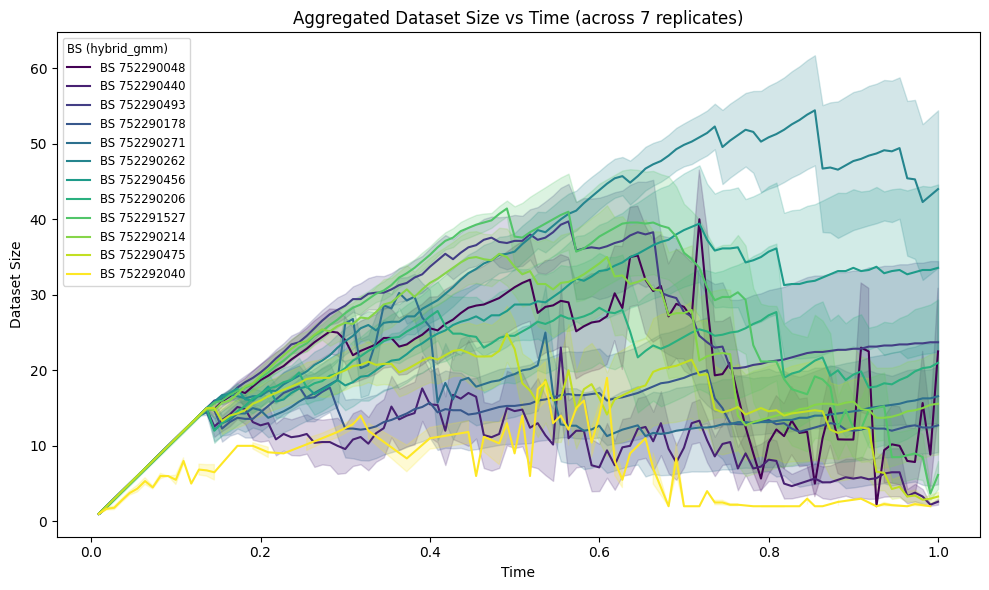

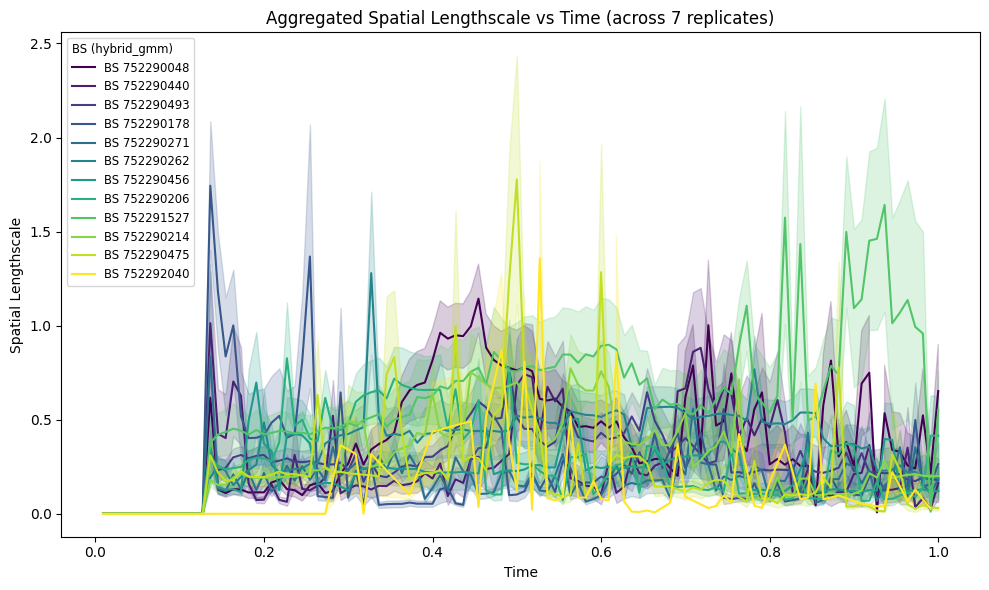

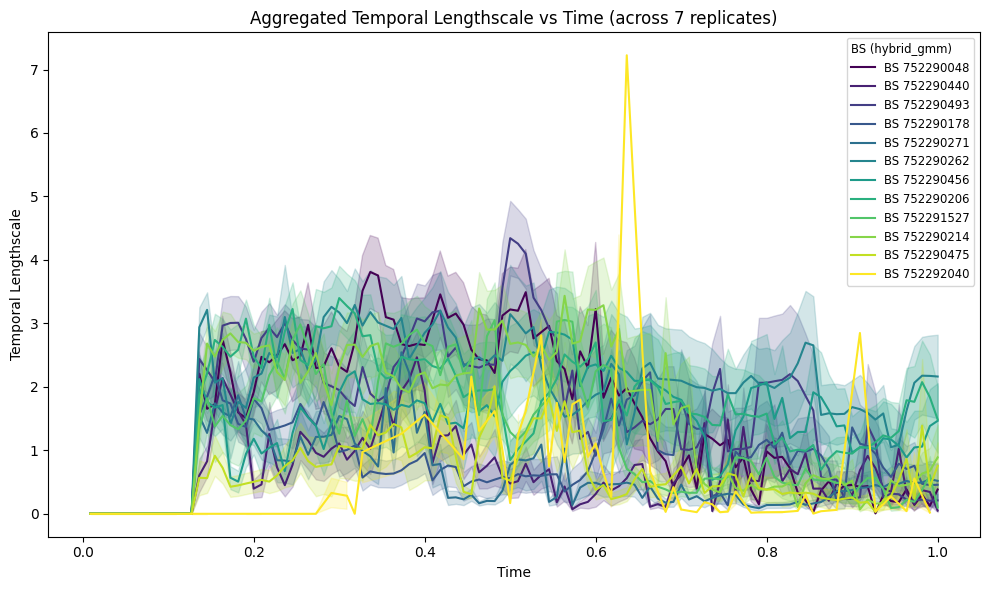

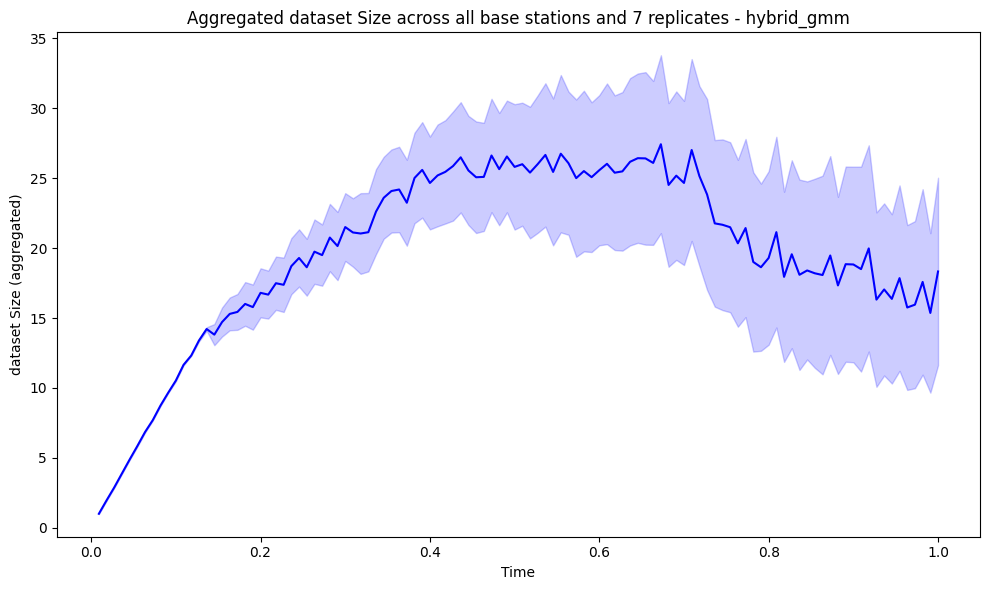

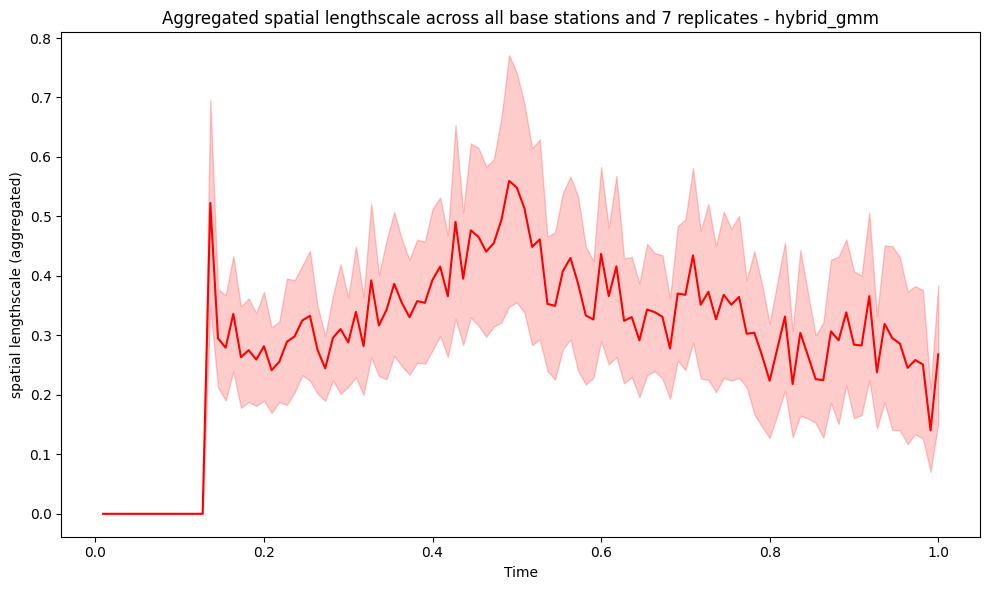

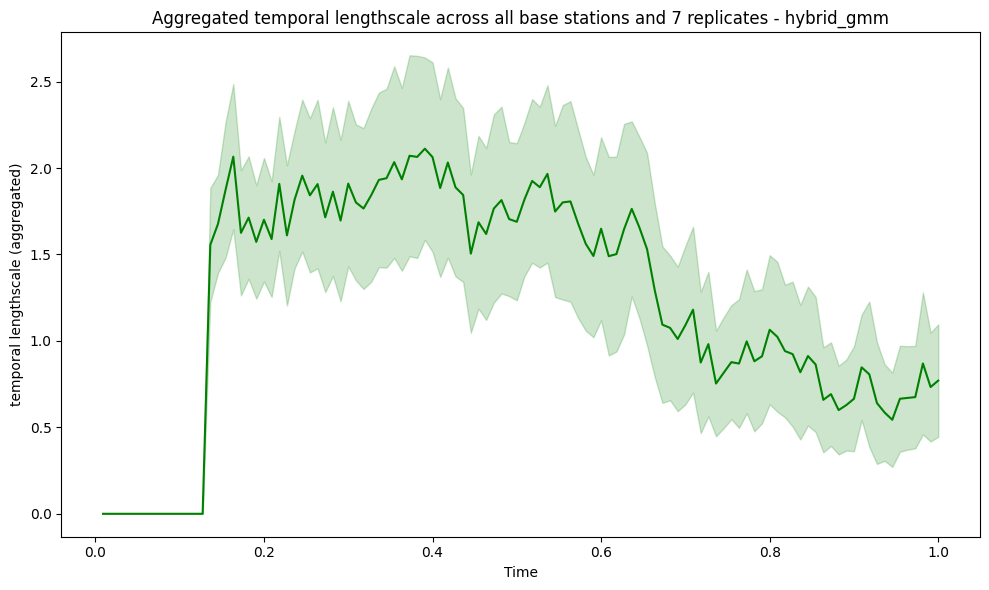

In [7]:
#Single motion model visualization
m_model = 'hybrid_gmm'
file_pattern = f'output/optimizers_logs/example/{m_model}/*.json'
aggregated_df, num_replicates = load_and_aggregate_data(file_pattern=file_pattern)

plot_single_model_metrics(df = aggregated_df, m_model = m_model,num_replicates= num_replicates)

Aggregated results for 7 replicates of "dataset Size" metric for "biased_random_walk" motion model.
Aggregated results for 7 replicates of "dataset Size" metric for "hybrid_gmm" motion model.
Aggregated results for 7 replicates of "dataset Size" metric for "random_waypoint" motion model.


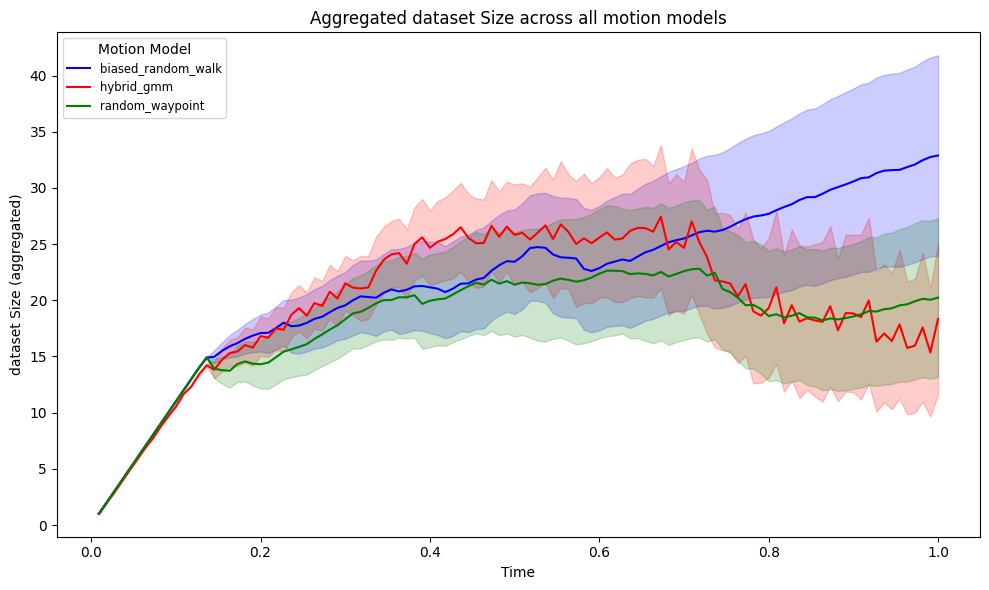

Aggregated results for 7 replicates of "spatial lengthscale" metric for "biased_random_walk" motion model.
Aggregated results for 7 replicates of "spatial lengthscale" metric for "hybrid_gmm" motion model.
Aggregated results for 7 replicates of "spatial lengthscale" metric for "random_waypoint" motion model.


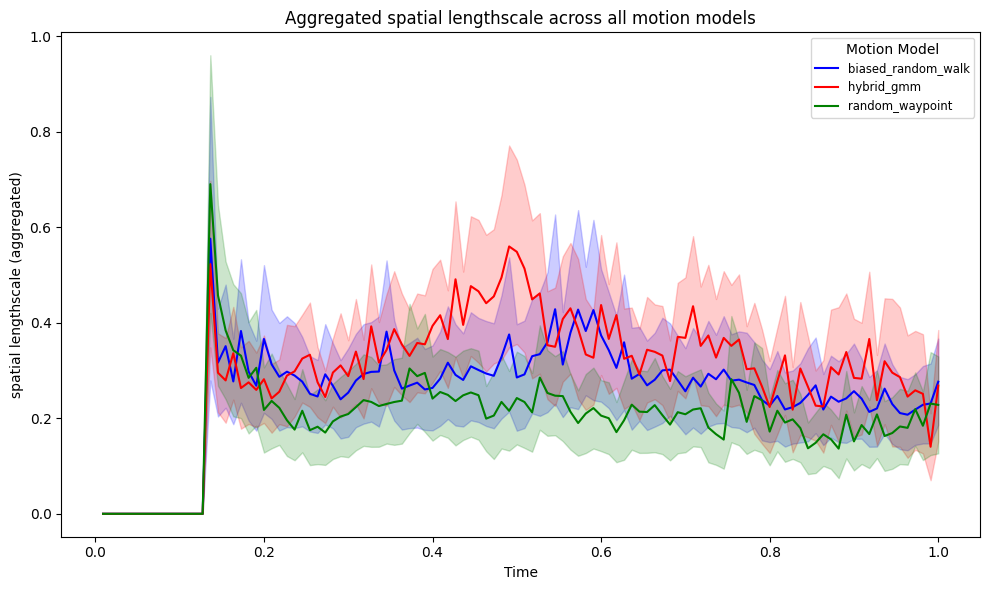

Aggregated results for 7 replicates of "temporal lengthscale" metric for "biased_random_walk" motion model.
Aggregated results for 7 replicates of "temporal lengthscale" metric for "hybrid_gmm" motion model.
Aggregated results for 7 replicates of "temporal lengthscale" metric for "random_waypoint" motion model.


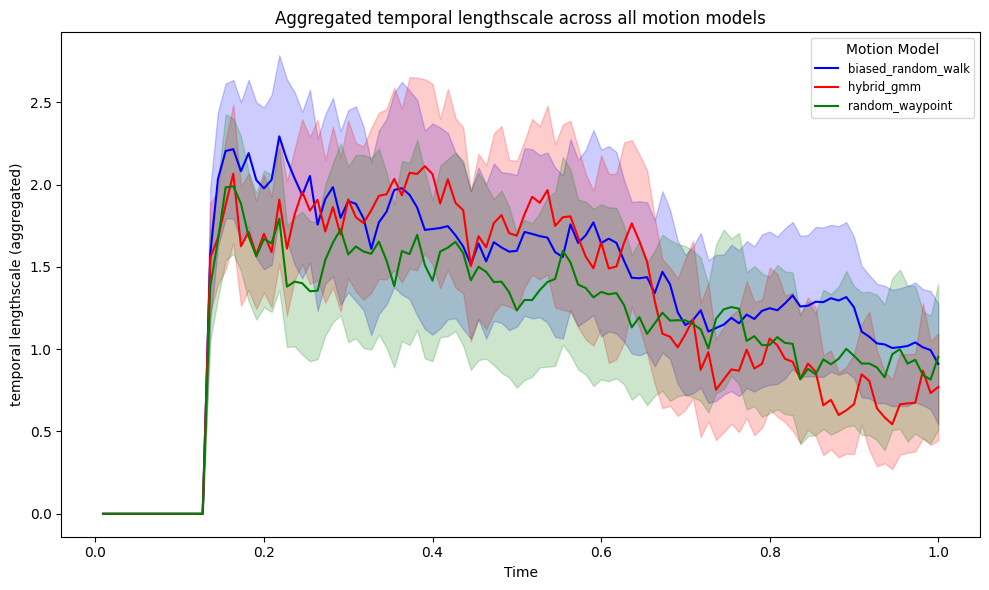

In [8]:
#Multiple motion models aggregation
motion_models = ['biased_random_walk', 'hybrid_gmm', 'random_waypoint']
metrics_to_plot = ['dataset Size', 'spatial lengthscale', 'temporal lengthscale']
rex_folder_path = f'output/optimizers_logs/example'
plot_aggregated_metrics_across_motion_models(models = motion_models, metrics = metrics_to_plot, rex_folder_path = rex_folder_path)

-----------------------------------------------------------------------------------------------